<a href="https://colab.research.google.com/github/Nanasz/Kelompok4-DataMining1/blob/main/Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Data
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Running Locally, yakinkan "file_" berada di folder "data"
try :
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/Nanasz/Kelompok4-DataMining1/main/Data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/Nanasz/Kelompok4-DataMining1/main/Data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/Nanasz/Kelompok4-DataMining1/main/Data/jakarta.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

In [3]:
frame = [dfJ, dfD, dfT]
data_rumah= pd.concat(frame, ignore_index = True)
data_rumah

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_rumah.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [5]:
data_rumah = data_rumah.drop(data_rumah.columns[14:26], axis= 1)
data_rumah.columns

Index(['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi',
       'sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi'],
      dtype='object')

In [6]:
data_rumah.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149
created_at,06-12-2021,02-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,06-12-2021,...,12-08-2021,12-08-2021,12-08-2021,12-08-2021,12-08-2021,12-08-2021,NaN,NaN,NaN,NaN
LT,202.0,30.0,19.0,33.0,30.0,217.0,424.0,597.0,60.0,33.0,...,300.0,60.0,66.0,202.0,108.0,91.0,NaN,NaN,NaN,NaN
LB,198.0,55.0,35.0,42.0,55.0,245.0,1000.0,700.0,98.0,42.0,...,148.0,55.0,70.0,85.0,130.0,91.0,NaN,NaN,NaN,NaN
KT,8.0,2.0,2.0,2.0,2.0,6.0,4.0,5.0,3.0,2.0,...,4.0,2.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN
KM,3.0,1.0,1.0,2.0,2.0,4.0,5.0,4.0,3.0,1.0,...,3.0,2.0,2.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN
garasi,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
carport,NaN,1.0,NaN,1.0,1.0,2.0,1.0,5.0,1.0,1.0,...,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
lokasi,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,Jakarta Pusat,...,"PONDOK CABE, TANGERANG","LIPPO KARAWACI, TANGERANG","Ciater, Tangerang","BSD Griya Loka, Tangerang","Pagedangan, Tangerang","Poris, Tangerang",NaN,NaN,NaN,NaN
sertifikat,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,SHM,...,SHM,"lainnya(PPJB, GIRIK, ADAT, dll)",SHM,SHM,SHM,SHM,NaN,NaN,NaN,NaN
listrik,2200.0,2200.0,2200.0,2200.0,2200.0,4400.0,33000.0,8000.0,2200.0,2200.0,...,2200.0,2200.0,1300.0,2200.0,2200.0,3500.0,NaN,NaN,NaN,NaN


In [7]:
data_rumah['listrik']

0       2200.0
1       2200.0
2       2200.0
3       2200.0
4       2200.0
         ...  
2145    3500.0
2146       NaN
2147       NaN
2148       NaN
2149       NaN
Name: listrik, Length: 2150, dtype: float64

In [8]:
# Check for missing values
data_rumah.isnull().sum()

created_at    1786
LT            1785
LB            1787
KT            1787
KM            1787
garasi        2043
carport       1874
lokasi        1787
sertifikat    1791
listrik       1816
hadap         2003
harga         1787
URL           1787
deskripsi     1796
dtype: int64

In [9]:
data_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  364 non-null    object 
 1   LT          365 non-null    object 
 2   LB          363 non-null    float64
 3   KT          363 non-null    float64
 4   KM          363 non-null    float64
 5   garasi      107 non-null    float64
 6   carport     276 non-null    float64
 7   lokasi      363 non-null    object 
 8   sertifikat  359 non-null    object 
 9   listrik     334 non-null    float64
 10  hadap       147 non-null    object 
 11  harga       363 non-null    float64
 12  URL         363 non-null    object 
 13  deskripsi   354 non-null    object 
dtypes: float64(7), object(7)
memory usage: 235.3+ KB


In [10]:
#menghilangkan missing value
data_rumah.dropna()
print(data_rumah.isnull().sum())

created_at    1786
LT            1785
LB            1787
KT            1787
KM            1787
garasi        2043
carport       1874
lokasi        1787
sertifikat    1791
listrik       1816
hadap         2003
harga         1787
URL           1787
deskripsi     1796
dtype: int64


In [11]:
# Descriptive statistics
data_rumah.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LB,363.0,1.914187e+02,2.434065e+02,15.0,60.0,109.0,2.425000e+02,2.500000e+03
KT,363.0,3.457300e+00,1.530616e+00,1.0,2.0,3.0,4.000000e+00,1.000000e+01
KM,363.0,2.677686e+00,1.480340e+00,1.0,2.0,2.0,4.000000e+00,1.000000e+01
garasi,107.0,1.962617e+00,1.619022e+00,1.0,1.0,1.0,2.000000e+00,1.000000e+01
carport,276.0,1.742754e+00,1.265968e+00,1.0,1.0,1.0,2.000000e+00,1.000000e+01
listrik,334.0,3.928144e+03,6.288522e+03,900.0,2200.0,2200.0,3.500000e+03,6.600000e+04
harga,363.0,2.995320e+09,1.007701e+10,41.0,870.0,2300.0,1.550000e+09,1.050000e+11


In [12]:
## Hapus missing values
data_rumah.dropna(inplace=True)
print(data_rumah.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64


In [13]:
data_rumah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 6 to 2143
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  43 non-null     object 
 1   LT          43 non-null     object 
 2   LB          43 non-null     float64
 3   KT          43 non-null     float64
 4   KM          43 non-null     float64
 5   garasi      43 non-null     float64
 6   carport     43 non-null     float64
 7   lokasi      43 non-null     object 
 8   sertifikat  43 non-null     object 
 9   listrik     43 non-null     float64
 10  hadap       43 non-null     object 
 11  harga       43 non-null     float64
 12  URL         43 non-null     object 
 13  deskripsi   43 non-null     object 
dtypes: float64(7), object(7)
memory usage: 5.0+ KB


In [14]:
data_rumah['sertifikat'].value_counts()

SHM                                36
SHM + IMB                           3
lainnya(PPJB, GIRIK, ADAT, dll)     2
SHM + IMB + PBB                     1
PPJB                                1
Name: sertifikat, dtype: int64

In [15]:
data_rumah['hadap'].value_counts()

Timur         12
Utara         12
Selatan        9
Barat          4
Timur Laut     3
timur          1
Tenggara       1
Barat Daya     1
Name: hadap, dtype: int64

In [16]:
#mengecek duplicate
data_rumah.drop_duplicates(inplace=True)
data_rumah.duplicated().sum()

0

In [17]:
missing_data = pd.DataFrame({'total_missing': data_rumah.isnull().sum(), 'perc_missing': (data_rumah.isnull().sum()/102)*100})
missing_data

,total_missing,perc_missing
created_at,0,0.0
LT,0,0.0
LB,0,0.0
KT,0,0.0
KM,0,0.0
garasi,0,0.0
carport,0,0.0
lokasi,0,0.0
sertifikat,0,0.0
listrik,0,0.0


Text(0.5, 0, 'Listrik')

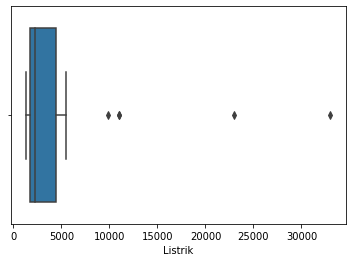

In [18]:
# Detect outliers
# Outlier di variabel listrik
ax = sns.boxplot(x=data_rumah["listrik"])
ax.set_xlabel('Listrik')

Terindikasi bahwa nilai outlier dari variabel listrik lebih dari 30000 watt.

Text(0.5, 0, 'Luas Bangunan')

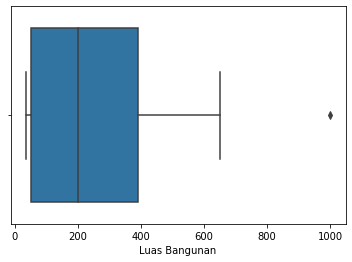

In [19]:
# Outlier di variabel Luas Bangunan
ax = sns.boxplot(x=data_rumah["LB"])
ax.set_xlabel('Luas Bangunan')

Terindikasi bahwa nilai outlier dari variabel luas tanah lebih dari  1000m2 .

Text(0.5, 0, 'Kamar Tidur')

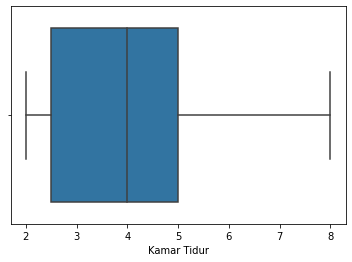

In [20]:
# Outlier di variabel Kamar Tidur
ax = sns.boxplot(x=data_rumah["KT"])
ax.set_xlabel('Kamar Tidur')

Text(0.5, 0, 'Kamar Mandi')

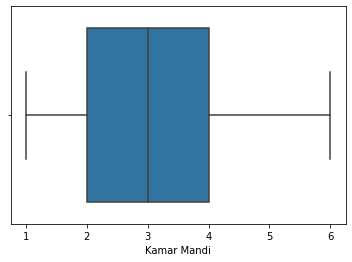

In [21]:
# Outlier di variabel Kamar Mandi
ax = sns.boxplot(x=data_rumah["KM"])
ax.set_xlabel('Kamar Mandi')

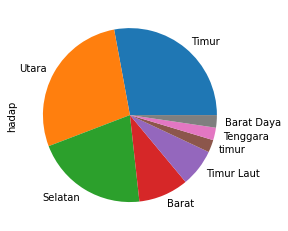

In [22]:
plot = data_rumah.hadap.value_counts().plot(kind='pie')

Terindikasi bahwa mayoritas rumah yang di jual di daerah Depok, Jakarta,dan Tangerang menghadap utara.

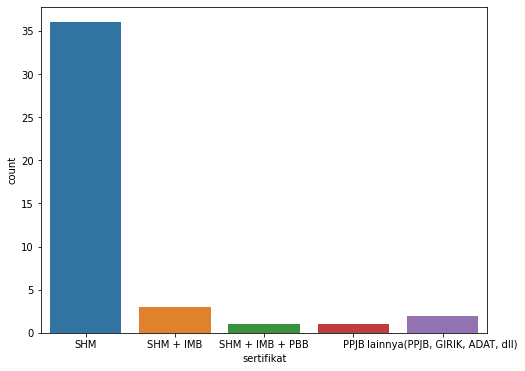

In [23]:
plt.figure(figsize=(8,6))
a = sns.countplot(x="sertifikat", data=data_rumah)

Terindikasi bahwa mayoritas rumah yang di jual di daerah Depok, Jakarta,dan Tangerang bersertifikat SHM (Sertifikat Hak Milik)

Sawangan                        6
Jakarta Selatan                 6
Jakarta Utara                   5
Jakarta Barat                   3
BSD, TANGERANG                  3
CIKUPA CITRA JAYA, TANGERANG    2
Cipayung                        2
Pancoran Mas                    2
BSD CITY, TANGERANG             1
PONDOK CABE, TANGERANG          1
Name: lokasi, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


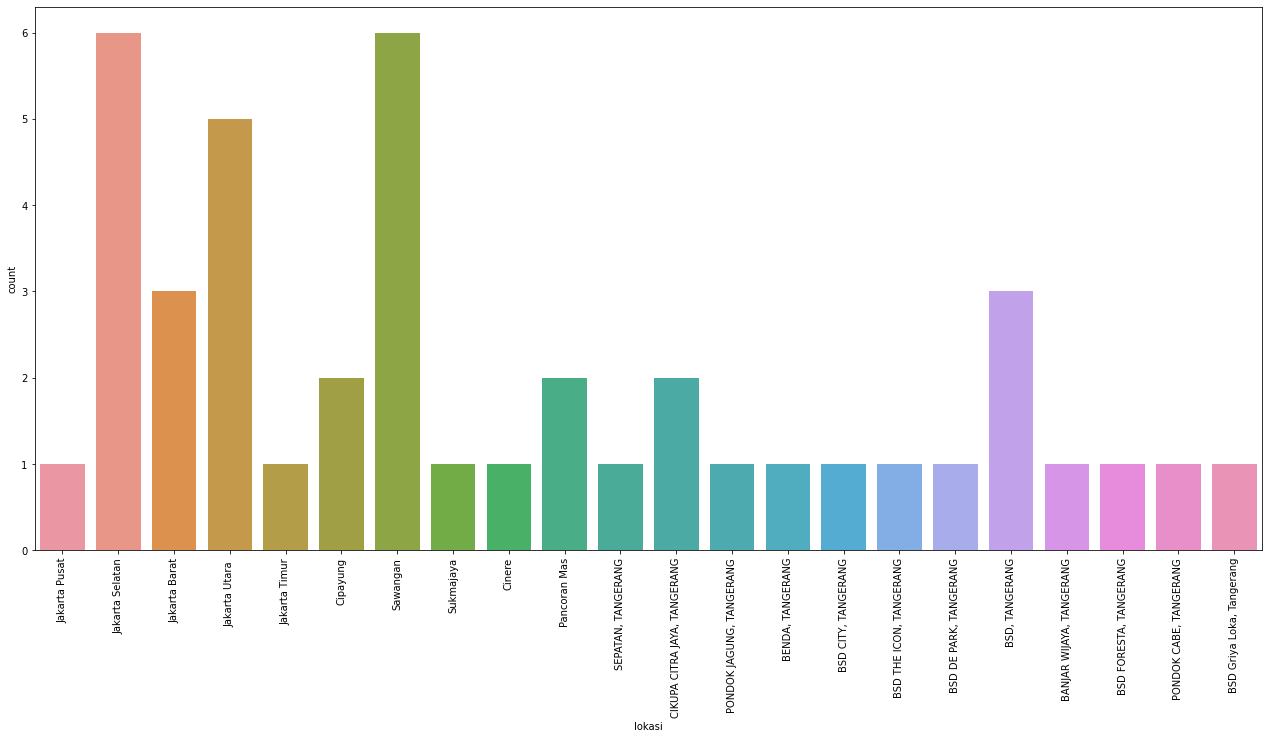

In [24]:
print(data_rumah['lokasi'].value_counts()[:10])
plt.figure(figsize=(22,10))
sns.countplot(data_rumah['lokasi'])
plt.xticks(rotation=90)
plt.show()

Terindikasi bahwa mayoritas rumah yang terjual berlokasi di Jakarta Selatan dan Sawangan.

In [25]:
dfJ = dfJ.drop(dfJ.columns[14:26], axis= 1)

In [26]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  121 non-null    object 
 1   LT          121 non-null    float64
 2   LB          121 non-null    float64
 3   KT          121 non-null    float64
 4   KM          121 non-null    float64
 5   garasi      44 non-null     float64
 6   carport     90 non-null     float64
 7   lokasi      121 non-null    object 
 8   sertifikat  119 non-null    object 
 9   listrik     120 non-null    float64
 10  hadap       36 non-null     object 
 11  harga       121 non-null    float64
 12  URL         121 non-null    object 
 13  deskripsi   112 non-null    object 
dtypes: float64(8), object(6)
memory usage: 112.1+ KB


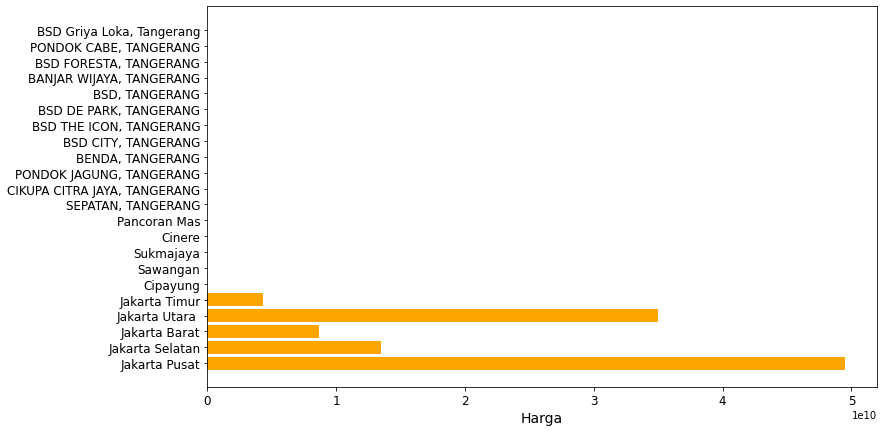

In [27]:
plt.figure(figsize=(12,7))
plt.barh(data_rumah['lokasi'], data_rumah['harga'], color='orange')
plt.xlabel('Harga', size = 14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

Terindikasi bahwa harga rumah paling tinggi berada di lokasi Jakarta Pusat.

In [28]:
#menghilangkan outlier
df = np.abs(data_rumah.harga - data_rumah.harga.mean())<=(2*data_rumah.harga.std())
print(df)

6       False
27       True
28       True
30       True
37       True
38       True
39       True
60       True
61       True
70       True
74       True
75      False
76       True
79       True
80       True
118      True
1036     True
1039     True
1046     True
1048     True
1049     True
1056     True
1064     True
1070     True
1100     True
1123     True
1124     True
1125     True
2029     True
2030     True
2032     True
2035     True
2038     True
2062     True
2067     True
2076     True
2077     True
2106     True
2112     True
2123     True
2131     True
2140     True
2143     True
Name: harga, dtype: bool


In [29]:
data_rumah2 = data_rumah[df]
print(data_rumah.shape, data_rumah2.shape)

(43, 14) (41, 14)


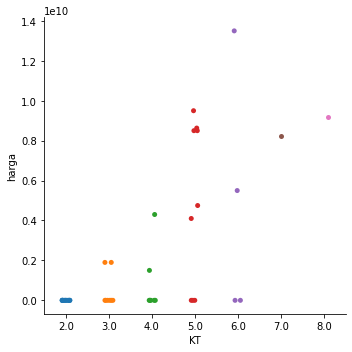

In [30]:
p = sns.catplot(x='KT', y='harga', data=data_rumah2)

Terlihat pada plot di atas bahwa jumlah kamar tidur pada rumah mempengaruhi harga. Terindikasi bahwa jumlah kamar tidur lebih besar dari enam memiliki harga yang lebih tinggi dibandingkan yang memiliki jumlah kamar tidur kurang dari 6.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


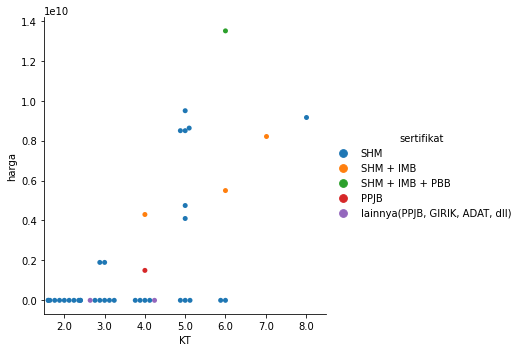

In [31]:
p1 = sns.catplot(x='KT', y='harga', hue='sertifikat', kind='swarm', data=data_rumah2)

Terindikasi pada plot di atas, jumlah rumah yang memiliki kamar tidur lebih dari 6 dan memiliki 3 sertifikat yaitu SHM, IMB, dan PBB cenderung memiliki harga yang paling tinggi.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


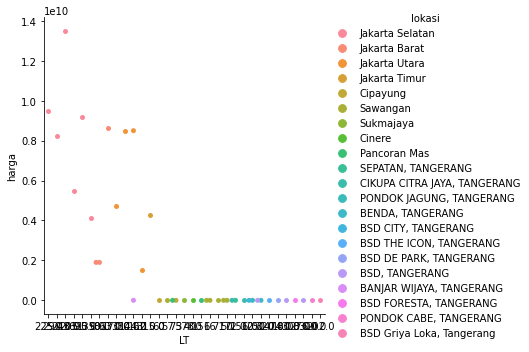

In [32]:
p1 = sns.catplot(x='LT', y='harga', hue='lokasi', kind='swarm', data=data_rumah2)

Terindikasi bahwa luas tanah cenderung lebih kecil, tetapi berada di lokasi jakarta selatan memiliki harga yang lebih tinggi dibandingkan dengan daerah lainnya.

Kesimpulan:

- Dapat diketahui bahwa luas tanah tidak mempengaruhi harga penjualan rumah dikarenakan lokasi dan sertifikat yang strategis mempengaruhi harga penjualan rumah.

- Jika kita ingin menghasilkan keuntungan yang lebih besar terhadap penjualan harga rumah maka kita dapat memilih lokasi yang strategis berdasarkan hasil analisis data daerah Jakarta, Depok dan Tangerang, diketahui bahwa daerah Jakarta khususnya Jakarta Selatan cenderung memiliki harga jual yang lebih tinggi.